In [15]:
import psycopg2
import numpy as np
import matplotlib.pyplot as plt


connection = psycopg2.connect(
    database="piscineds",
    user="pbureera",
    password="mysecretpassword",
    host="localhost",
    port="5432",
)
connection.autocommit = True
cursor = connection.cursor()


In [16]:
cursor.execute(
    """
    SELECT
        SUM(price) AS count,
        AVG(price) AS mean,
        SQRT(VARIANCE(price)) AS std,
        MIN(price) AS min,
        PERCENTILE_CONT(0.25) WITHIN GROUP (ORDER BY price) AS "25%",
        PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY price) AS "50%",
        PERCENTILE_CONT(0.75) WITHIN GROUP (ORDER BY price) AS "75%",
        MAX(price) AS max
    FROM customers
    WHERE event_type = 'purchase';
    """
)
data = cursor.fetchall()
column_names = [desc[0] for desc in cursor.description]
stats = [(col, val) for col, val in zip(column_names, data[0])]
print("\n".join([f"{col}\t{val}" for col, val in stats]))


count	6348004.870008912
mean	4.932377889171475
std	8.924840870550286
min	-79.37
25%	1.59
50%	3.0
75%	5.4
max	327.78


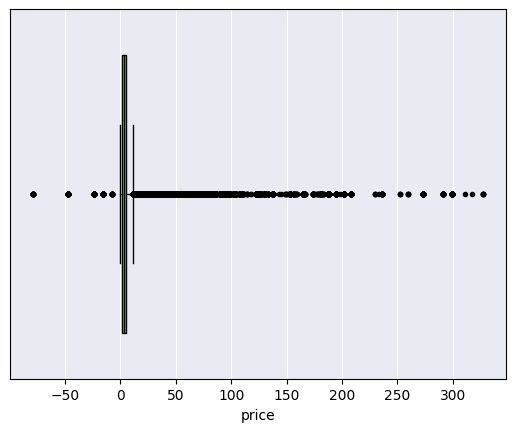

In [17]:
cursor.execute(
    """
    SELECT price FROM customers
    WHERE event_type = 'purchase'
    """
)
data = cursor.fetchall()
prices = [item[0] for item in data]
fig, ax = plt.subplots()
flierprops = dict(marker='o', markerfacecolor='black', markersize=3,
                  linestyle='none')
medianprops = dict(linestyle='-', color='black')
box = ax.boxplot(prices, vert=False, flierprops=flierprops, medianprops=medianprops, patch_artist=True, zorder=3)
for b in box['boxes']:
    b.set_facecolor('darkseagreen')
plt.ylim(0.9, 1.1)
plt.xlabel("price")
plt.yticks([])

plt.gca().set_facecolor('#EAEAF2')
plt.grid(visible=True, axis='x', color='white', linestyle='-', linewidth=0.7)
plt.show()

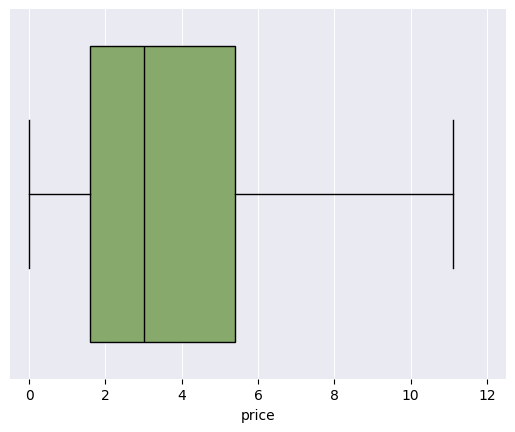

In [18]:
boxprops = dict(facecolor='#87A96B', color='black')
medianprops = dict(color='black')

fig, ax = plt.subplots()

ax.boxplot(prices,
           vert=False,
           widths=0.8,
           flierprops=flierprops,
           patch_artist=True,
           boxprops=boxprops,
           showfliers=False,
           medianprops=medianprops
           )

ax.set_xlim(-0.5, 12.5)
# Hide the axis lines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xlabel("price")
plt.yticks([])

plt.gca().set_facecolor('#EAEAF2')
plt.gca().spines['bottom'].set_visible(False)
plt.grid(visible=True, axis='x', color='white', linestyle='-', linewidth=0.7)
plt.show()


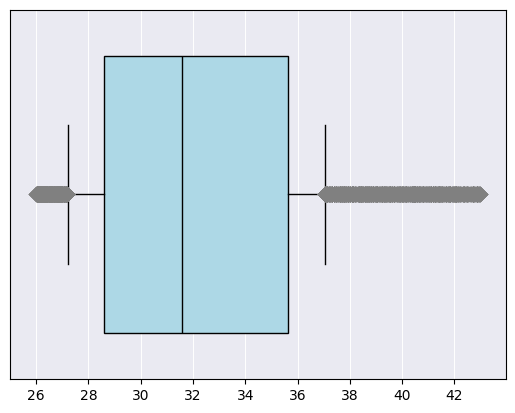

In [40]:
cursor.execute(
    """
    SELECT user_id, AVG(price) AS avg_cart_price
    FROM customers
    WHERE event_type = 'cart'
    GROUP BY user_id
    HAVING AVG(price) BETWEEN 26 AND 43;
    """
)
data = cursor.fetchall()
average_basket_prices = [item[1] for item in data]
plt.boxplot(average_basket_prices,
                vert=False,
                widths=0.75,
                boxprops=dict(facecolor="lightblue",
                              edgecolor="black"),
                flierprops=dict(marker="D",
                                markerfacecolor="gray",
                                markersize=8,
                                markeredgecolor="none"),
                medianprops=dict(color='black'),
                patch_artist=True,
                whis=0.2)
plt.xticks(np.arange(int(min(average_basket_prices)),
                         int(max(average_basket_prices)) + 1,
                         step=2))
plt.xlim(min(average_basket_prices) - 1,
             max(average_basket_prices) + 1)
plt.yticks([])
plt.gca().set_facecolor('#EAEAF2')
plt.grid(visible=True, axis='x', color='white', linestyle='-', linewidth=0.7)
plt.show()